In [2]:
import pandas as pd

co2 = pd.read_csv(r"C:\Users\GDM\Downloads\pythonmaps\emissions\data\EDGAR_2024_GHG_CO2_2023_TOTALS\EDGAR_2024_GHG_CO2_2023_TOTALS.txt", delimiter=';')

print(co2)

          lat    lon      emission
0        55.3   72.5   2789.260000
1        28.7    9.3   6963.290000
2        50.7 -113.5  11462.100000
3        53.1   36.1   2175.370000
4        60.6   41.5   1305.630000
...       ...    ...           ...
4196020   9.4  -64.2      0.748653
4196021 -20.9  129.9     96.777000
4196022 -37.9   59.3      1.153120
4196023 -44.7   57.6      2.323890
4196024  70.3  -11.8      3.624890

[4196025 rows x 3 columns]


In [3]:
co2 = co2.sort_values('emission', ascending=False)
print(co2[:10])

          lat    lon     emission
790962   21.9  113.6  462582000.0
2557941  27.1   49.7  119375000.0
3306706  -6.6  105.7   96230700.0
3031431  18.2   72.9   95830000.0
901468   49.2  143.1   77381100.0
838817   31.4  121.4   69643200.0
966384   30.1  115.0   60761300.0
3434544  41.0  122.5   59353000.0
389748   53.4   59.0   55712600.0
2806855  31.2  121.3   52444100.0


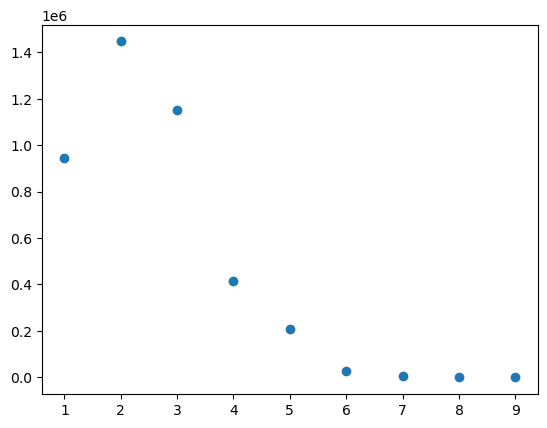

In [4]:
import matplotlib.pyplot as plt

co2['em_int'] = co2['emission'].astype(int).astype(str)
co2['em_str'] = co2['em_int'].str.len()
x = co2.em_str.value_counts()
plt.scatter(x.index, x.values)
plt.show()

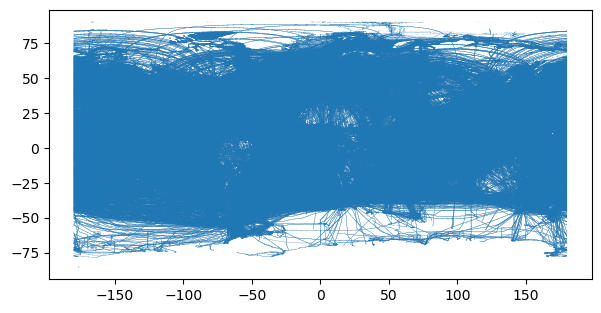

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05,  edgecolors='none')
plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw1.png", dpi=100, bbox_inches='tight')

plt.show()

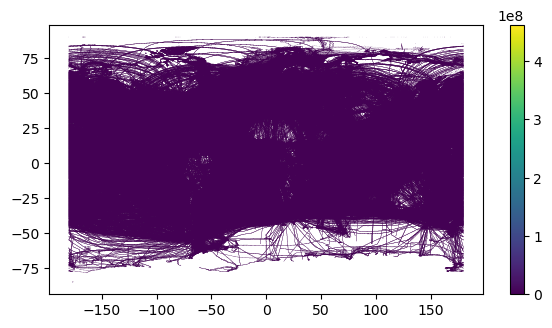

In [7]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], s=0.05, edgecolors='none', )
plt.colorbar(cols)
plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw2.png", dpi=100, bbox_inches='tight')

plt.show()

In [8]:
import numpy as np

print(co2.emission.value_counts())
print()
print("Min value: ", np.amin(co2.emission))
print("Max value: ", np.amax(co2.emission))

emission
2.172370e+00    581
6.643900e+00    572
8.780910e-01    371
8.543520e-01    350
1.937310e+00    331
               ... 
3.198230e+02      1
3.198240e+02      1
3.198270e+02      1
3.198280e+02      1
9.853230e-12      1
Name: count, Length: 2300151, dtype: int64

Min value:  9.85323e-12
Max value:  462582000.0


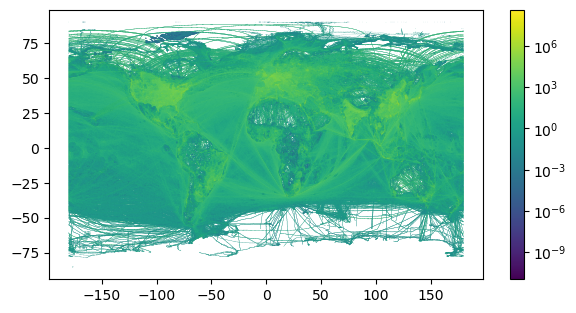

In [9]:
from matplotlib import colors

fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(co2['lon'], co2['lat'], c=co2['emission'], norm=colors.LogNorm(), s=0.05, edgecolors='none', )
plt.colorbar(cols)
plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw3.png", dpi=100, bbox_inches='tight')

plt.show()

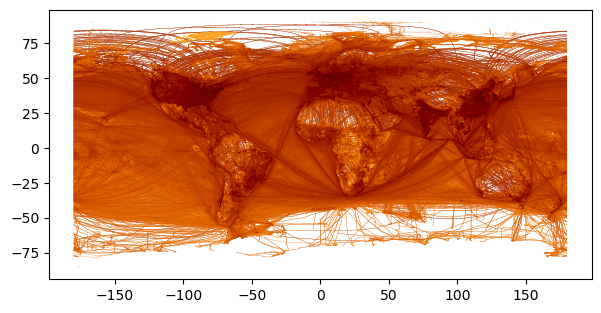

In [10]:
fig = plt.figure()
fig.set_size_inches(7, 3.5)
plt.scatter(co2['lon'], co2['lat'], s=0.05, edgecolors='none', c=co2['emission'], norm=colors.LogNorm(), cmap='afmhot_r')
plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw4.png", dpi=100, bbox_inches='tight')

plt.show()

In [11]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(co2['lon'], co2['lat'])]
geodata = gpd.GeoDataFrame(co2, crs="EPSG:4326", geometry=geometry)

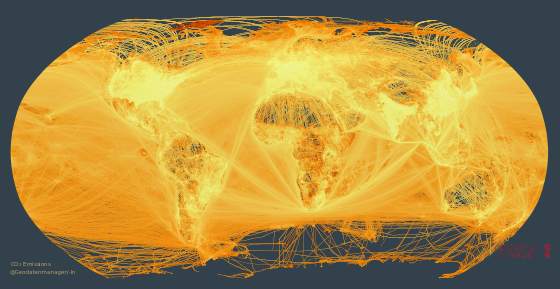

In [ ]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='#32414B', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('#32414B')
fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap='afmhot', norm=colors.LogNorm(), s=0.05, edgecolors='none')
plt.setp(ax.spines.values(), color='#32414B')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#32414B')
ax.set_ylim(-8000000, 9000000)

logo = plt.imread(r"C:\Users\GDM\Downloads\pythonmaps\ut_logo.png")
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissions \n@ Geodatenmanager/-in",
              size=4,
              color='#B4A069',
              transform = ax.transAxes)

plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [14]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

our_cmap = cm.get_cmap('afmhot', 11)
newcolors = our_cmap(np.linspace(0, 1, 11))
newcolors = newcolors[1:]

black = np.array([0.0, 0.0, 0.0, 1.0])
#newcolors[:1, :] = black
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 0.06, 6, 60, 600, 3000, 6000, 24000, 45000, 120000]
[]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

C:\Users\GDM\AppData\Local\Temp\ipykernel_7628\625290037.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  our_cmap = cm.get_cmap('afmhot', 11)


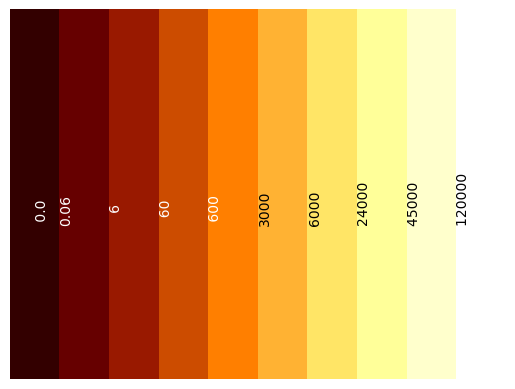

In [15]:
gradient = np.linspace(0, 1, 10)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=our_cmap)
plt.axis('off')
plt.text(0., 0.65, " 0.0", color='white', rotation='vertical',)
plt.text(0.5, 0.65, "0.06", color='white', rotation='vertical',)
plt.text(1.5, 0.65, "   6", color='white', rotation='vertical',)
plt.text(2.5, 0.65, "  60", color='white', rotation='vertical',)
plt.text(3.5, 0.65, " 600", color='white', rotation='vertical',)
plt.text(4.5, 0.65, "3000", color='black', rotation='vertical',)
plt.text(5.5, 0.65, "6000", color='black', rotation='vertical',)
plt.text(6.5, 0.65, "24000 ", color='black', rotation='vertical',)
plt.text(7.5, 0.65, "45000 ", color='black', rotation='vertical',)
plt.text(8.5, 0.65, "120000  ", color='black', rotation='vertical',)

#plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

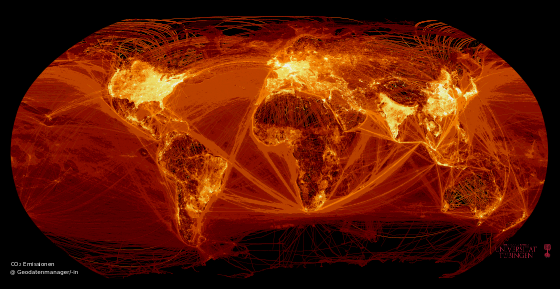

In [16]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissionen \n@ Geodatenmanager/-in",
              size=4,
              color='white',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)
plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw6.png", dpi=600, bbox_inches='tight')
plt.show()

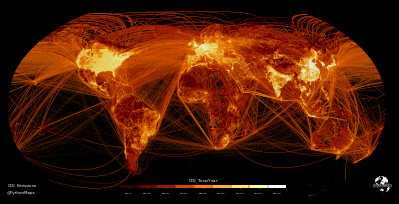

In [ ]:
fig, ax = plt.subplots(facecolor='black', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('black')

fig.set_size_inches(7, 3.5)
ax = geodata.plot(ax=ax, column='emission', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "CO$_2$ Emissionen \n@ Geodatenmanager/-in",
              size=4,
              color='white',
              transform = ax.transAxes)

ax.set_ylim(-8000000, 9000000)

fig = ax.get_figure()
cax = fig.add_axes([0.36, 0.16, 0.33, 0.01])
sm = plt.cm.ScalarMappable(cmap=our_cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, cax=cax, orientation="horizontal", pad=0.2, format='%.1e',
                  ticks=[0.03, 3, 33, 330, 1800, 4500, 15000, 34500, 82500],
                  drawedges=True)
cb.outline.set_visible(False)
#cb.outline.set_linewidth(0.00001)
#cb.outline.set_color('white')
cb.ax.tick_params(labelsize=2, width=0.5, length=0.5, color='white') 
cbytick_obj = plt.getp(cb.ax, 'xticklabels' ) #Set y tick label color
plt.setp(cbytick_obj, color='white')
cb.ax.set_xlabel('CO$_2$ Tonnen/Jahr', fontsize=4, color='white', labelpad=-16)


plt.savefig(r"C:\Users\GDM\Downloads\pythonmaps\emissions\output\raw7.png", dpi=600, bbox_inches='tight')
plt.show()